In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, cumtrapz
from scipy.interpolate import interp1d
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
from ler.lens_galaxy_population import optical_depth
from numba import njit
from ler.utils import  interpolator_from_pickle,cubic_spline_interpolator
from tqdm import tqdm


In [2]:
od1 = optical_depth.OpticalDepth(
    npool=4,
    z_min=0.001,
    z_max=5.0,
    functions=dict(
        strong_lensing_condition="rjs_with_cross_section",
        optical_depth="optical_depth_SIS_haris",
    ),
    sampler_priors=dict(
        lens_redshift="lens_redshift_SDSS_catalogue",
        velocity_dispersion="velocity_dispersion_gengamma",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=0, vd_max=600),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    create_new_interpolator=dict(
        velocity_dispersion=dict(create_new=True, resolution=100), 
        optical_depth=dict(create_new=True, resolution=100), 
        z_to_Dc=dict(create_new=True, resolution=100), 
        Dc_to_z=dict(create_new=True, resolution=100),
        angular_diameter_distance=dict(create_new=True, resolution=100),
        differential_comoving_volume=dict(create_new=True, resolution=100),
        )
    )

z_to_Dc interpolator will be generated at ./interpolator_pickle/z_to_Dc/z_to_Dc_3.pickle
Dc_to_z interpolator will be generated at ./interpolator_pickle/Dc_to_z/Dc_to_z_3.pickle
angular_diameter_distance interpolator will be generated at ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_3.pickle
differential_comoving_volume interpolator will be generated at ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_gengamma interpolator will be generated at ./interpolator_pickle/velocity_dispersion_gengamma/velocity_dispersion_gengamma_2.pickle


In [4]:
od2 = optical_depth.OpticalDepth(
    npool=4,
    z_min=0.001,
    z_max=5.0,
    functions=dict(
        strong_lensing_condition="rjs_with_cross_section",
        optical_depth="optical_depth_SIS_hemanta",
    ),
    sampler_priors=dict(
        lens_redshift="lens_redshift_SDSS_catalogue",
        velocity_dispersion="velocity_dispersion_bernardi",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=0., vd_max=600),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    create_new_interpolator=dict(
        velocity_dispersion=dict(create_new=False, resolution=100), 
        optical_depth=dict(create_new=False, resolution=100), 
        z_to_Dc=dict(create_new=False, resolution=100), 
        Dc_to_z=dict(create_new=False, resolution=100),
        angular_diameter_distance=dict(create_new=False, resolution=100),
        differential_comoving_volume=dict(create_new=False, resolution=100),
        )
    )

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_3.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_3.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_3.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_bernardi interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_bernardi/velocity_dispersion_bernardi_3.pickle
optical_depth_SIS_hemanta interpolator will be generated at ./interpolator_pickle/optical_depth_SIS_hemanta/optical_depth_SIS_hemanta_4.pickle


In [3]:
od3 = optical_depth.OpticalDepth(
    npool=4,
    z_min=0.001,
    z_max=10.0,
    functions=dict(
        strong_lensing_condition="rjs_with_cross_section",
        optical_depth="optical_depth_SIE_hemanta",
    ),
    sampler_priors=dict(
        lens_redshift="lens_redshift_SDSS_catalogue",
        velocity_dispersion="velocity_dispersion_bernardi",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        lens_redshift=dict(z_min=0.001, z_max=10),
        velocity_dispersion=dict(vd_min=0, vd_max=600),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    create_new_interpolator=dict(
        velocity_dispersion=dict(create_new=True, resolution=100), 
        optical_depth=dict(create_new=True, resolution=5), 
        z_to_Dc=dict(create_new=False, resolution=100), 
        Dc_to_z=dict(create_new=False, resolution=100),
        angular_diameter_distance=dict(create_new=False, resolution=100),
        differential_comoving_volume=dict(create_new=False, resolution=100),
        )
    )

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
velocity_dispersion_bernardi interpolator will be generated at ./interpolator_pickle/velocity_dispersion_bernardi/velocity_dispersion_bernardi_2.pickle
optical_depth_SIE_hemanta interpolator will be generated at ./interpolator_pickle/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_3.pickle


  0%|                                                                         | 0/5 [00:00<?, ?it/s]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [5]:
from ler.utils import interpolator_from_pickle, cubic_spline_interpolator

z_max=10.
Dc = lambda z_: od1.cosmo.comoving_distance(z_).value  # co-moving distance in Mpc
resolution = od1.c_n_i["z_to_Dc"]["resolution"]
create_new = od1.c_n_i["z_to_Dc"]["create_new"]
spline1 = interpolator_from_pickle(
    param_dict_given= dict(z_min=0.001, z_max=z_max, cosmology=od1.cosmo, resolution=resolution),
    directory=od1.directory,
    sub_directory="z_to_Dc", 
    name="z_to_Dc",
    x = np.linspace(0.001, z_max, ),
    pdf_func= Dc, 
    conditioned_y=None, 
    dimension=1,
    category="function",
    create_new= create_new,
)
z_to_Dc = lambda z_: cubic_spline_interpolator(z_, spline1[0], spline1[1])

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_1.pickle


In [16]:
from ler.utils import inverse_transform_sampler
from numba import njit

@njit
def velocity_dispersion_ewoud(size, zl, vd_inv_cdf, z_min, z_max, vd_min, vd_max, init_sigma=[]):

    zlist = np.linspace(z_min, z_max, 100)
    # find the index of z in zlist
    idx = np.searchsorted(zlist, zl)
    # get the interpolator (inverse cdf) and sample
    sigma = inverse_transform_sampler(size, vd_inv_cdf[idx][0], vd_inv_cdf[idx][1])
    # choose sigma that is within the range
    sigma = np.concatenate((init_sigma,sigma[(sigma>vd_min) & (sigma<vd_max)]))
    size_ = size - len(sigma)
    if size_ <= 0:
        return sigma
    else:
        return velocity_dispersion_ewoud(size_, zl, vd_inv_cdf, z_min, z_max, vd_min, vd_max, sigma)

In [26]:
@njit
def velocity_dispersion_ewoud(size, zl, vd_inv_cdf, z_min, z_max):

    zlist = np.linspace(z_min, z_max, 100)
    # find the index of z in zlist
    idx = np.searchsorted(zlist, zl)

    return inverse_transform_sampler(size, vd_inv_cdf[idx][0], vd_inv_cdf[idx][1])

    

In [27]:
test = velocity_dispersion_ewoud(size=10000, zl=0.1, vd_inv_cdf=od4.vd_inv_cdf, z_min=0.001, z_max=10.)

In [4]:
od4.sample_velocity_dispersion(10, 0.1)

array([204.35238368, 314.41913927, 114.4254304 , 158.80447022,
       249.254939  , 220.33665364, 108.38681603, 143.80346551,
       128.92334568, 323.58912597])

In [8]:
# 1.zs 2.idx common(3.no 4.vd_inv_cdf 5.Da_zs 6.dVcdz 7.z_array)
# z_array needed for 2d vd_inv_cdf
# test the fuction optical_depth_multiprocessing
# change from imap to map with idx

array([400.64714927, 226.49248925, 221.91659653, 172.91738817,
       235.44048775, 137.25328544, 198.90881824, 137.07538246,
       178.13688281, 176.76003575])

In [25]:
from ler.lens_galaxy_population import phi
from ler.utils import interpolator_from_pickle

vd_name = "velocity_dispersion_ewoud"
param_dict_given_ = dict(z_min=od1.z_min, z_max=od1.z_max, vd_min=od1.vd_min, vd_max=od1.vd_max, cosmology=cosmo, name=vd_name, resolution=od1.c_n_i["velocity_dispersion"]["resolution"])
sub_directory_ = vd_name
x_ = np.linspace(od1.vd_min, od1.vd_max, od1.c_n_i["velocity_dispersion"]["resolution"])
category_ = "inv_cdf"
create_new_ = od1.c_n_i["velocity_dispersion"]["create_new"]

pdf_func_ = lambda vd_, zl_: phi(vd_,zl_)*od1.differential_comoving_volume(np.array([zl_]))
conditioned_y_ = np.linspace(od1.z_min, od1.z_max, 100)
dimension_ = 2

vd_inv_cdf = interpolator_from_pickle(
                    param_dict_given = param_dict_given_,
                    directory=od1.directory,
                    sub_directory=sub_directory_,
                    name=vd_name,
                    x = x_,
                    pdf_func= pdf_func_,
                    conditioned_y=conditioned_y_,
                    dimension=dimension_,
                    category=category_,
                    create_new=create_new_,
                )

velocity_dispersion_ewoud interpolator will be generated at ./interpolator_pickle/velocity_dispersion_ewoud/velocity_dispersion_ewoud_3.pickle


In [2]:
od4 = optical_depth.OpticalDepth(
    npool=2,
    z_min=0.001,
    z_max=10.0,
    functions=dict(
        strong_lensing_condition="rjs_with_cross_section",
        optical_depth="optical_depth_SIE_hemanta",
    ),
    sampler_priors=dict(
        lens_redshift="lens_redshift_SDSS_catalogue",
        velocity_dispersion="velocity_dispersion_ewoud",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        lens_redshift=dict(z_min=0.001, z_max=10),
        velocity_dispersion=dict(vd_min=0, vd_max=600),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    create_new_interpolator=dict(
        velocity_dispersion=dict(create_new=True, resolution=100), 
        optical_depth=dict(create_new=True, resolution=100),
        z_to_Dc=dict(create_new=False, resolution=100), 
        Dc_to_z=dict(create_new=False, resolution=100),
        angular_diameter_distance=dict(create_new=False, resolution=100),
        differential_comoving_volume=dict(create_new=False, resolution=100),
        )
    )

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
velocity_dispersion_ewoud interpolator will be generated at ./interpolator_pickle/velocity_dispersion_ewoud/velocity_dispersion_ewoud_3.pickle


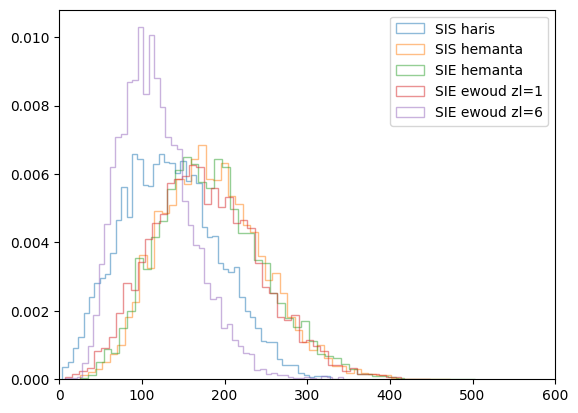

In [7]:
# plot hist
sigma1 = od1.sample_velocity_dispersion(size=5000,)
sigma2 = od2.sample_velocity_dispersion(size=5000)
sigma3 = od3.sample_velocity_dispersion(size=5000)
sigma4 = od4.sample_velocity_dispersion(size=5000, zl=1)
sigma5 = od4.sample_velocity_dispersion(size=5000, zl=6)
plt.hist(sigma1, bins=50, density=True, alpha=0.5, label="SIS haris", histtype="step")
plt.hist(sigma2, bins=50, density=True, alpha=0.5, label="SIS hemanta", histtype="step")
plt.hist(sigma3, bins=50, density=True, alpha=0.5, label="SIE hemanta", histtype="step")
plt.hist(sigma4, bins=50, density=True, alpha=0.5, label="SIE ewoud zl=1", histtype="step")
plt.hist(sigma5, bins=50, density=True, alpha=0.5, label="SIE ewoud zl=6", histtype="step")
plt.xlim(0, 600)
plt.legend()
plt.show()

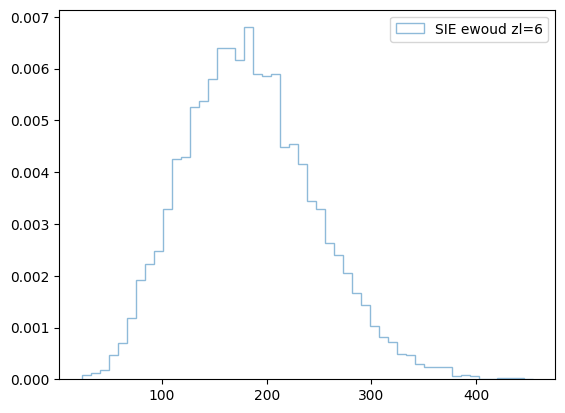

In [28]:
# sigma = od4.sample_velocity_dispersion(size=5000, zl=7)
plt.hist(test, bins=50, density=True, alpha=0.5, label="SIE ewoud zl=6", histtype="step")
plt.legend()
plt.show()

In [5]:
od4.vd_inv_cdf[](100, zl=7)

TypeError: 'list' object is not callable

In [11]:
od3.optical_depth_calculator([0.2,1])

INFO:numba.core.transforms:finding looplift candidates


array([1.61754994e+20, 9.66136610e+21])

In [12]:
od4.optical_depth(0.2)

array(1.3471138e+09)

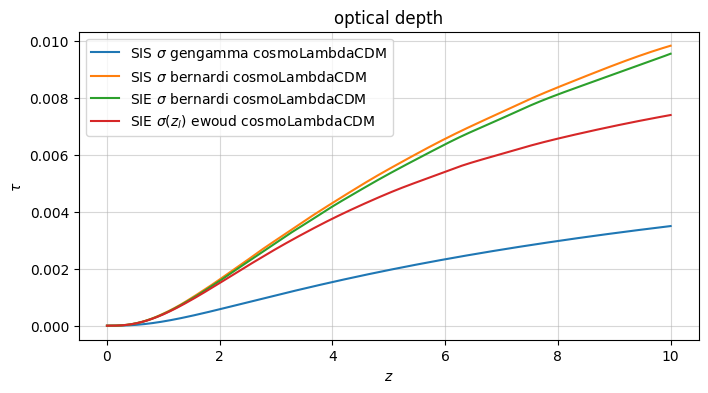

In [10]:
z = np.linspace(0.001, 10, 1000)
# plot od.tau
plt.figure(figsize=(8,4))
plt.plot(z, od1.strong_lensing_optical_depth(z), label=r"SIS $\sigma$ gengamma cosmoLambdaCDM")
plt.plot(z, od2.strong_lensing_optical_depth(z), label=r"SIS $\sigma$ bernardi cosmoLambdaCDM")
plt.plot(z, od3.strong_lensing_optical_depth(z), label=r"SIE $\sigma$ bernardi cosmoLambdaCDM")
plt.plot(z, od4.strong_lensing_optical_depth(z), label=r"SIE $\sigma(z_l)$ ewoud cosmoLambdaCDM")
# plt.plot(z, od4.optical_depth(z), label=r"SIE $\sigma(z_l)$ ewoud planck18")
plt.xlabel(r"$z$")
plt.ylabel(r"$\tau$")
#plt.xlim(0, 2)
#plt.ylim(0, 0.002)
plt.legend()
plt.grid(alpha=0.5)
plt.title("optical depth")
plt.show()

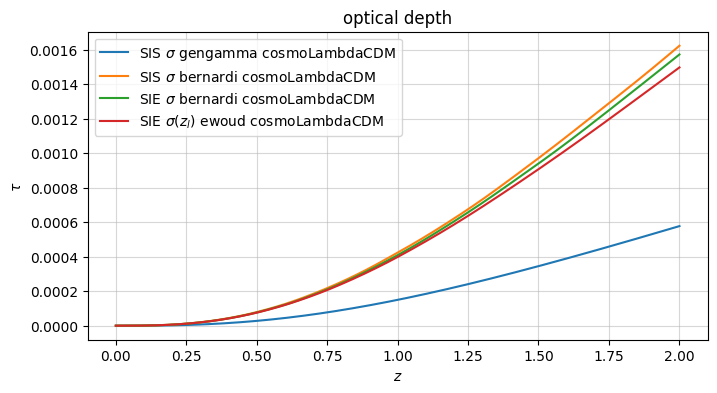

In [11]:
z = np.linspace(0.001, 2, 1000)
# plot od.tau
plt.figure(figsize=(8,4))
plt.plot(z, od1.strong_lensing_optical_depth(z), label=r"SIS $\sigma$ gengamma cosmoLambdaCDM")
plt.plot(z, od2.strong_lensing_optical_depth(z), label=r"SIS $\sigma$ bernardi cosmoLambdaCDM")
plt.plot(z, od3.strong_lensing_optical_depth(z), label=r"SIE $\sigma$ bernardi cosmoLambdaCDM")
plt.plot(z, od4.strong_lensing_optical_depth(z), label=r"SIE $\sigma(z_l)$ ewoud cosmoLambdaCDM")
# plt.plot(z, od4.optical_depth(z), label=r"SIE $\sigma(z_l)$ ewoud planck18")
plt.xlabel(r"$z$")
plt.ylabel(r"$\tau$")
#plt.xlim(0, 2)
#plt.ylim(0, 0.002)
plt.legend()
plt.grid(alpha=0.5)
plt.title("optical depth")
plt.show()

In [3]:
from ler.lens_galaxy_population import optical_depth_sie2_mp, optical_depth_sie1_mp 
from ler.utils import cubic_spline_interpolator, inverse_transform_sampler
from ler.lens_galaxy_population import phi_cut_SIE, axis_ratio_rayleigh
from multiprocessing import Pool

In [4]:
# set up the parameters
zs = np.linspace(0.001, 5, 5)
zs = np.array([zs]).reshape(-1)
no = 8*1e-3*od4.cosmo.h**3
vd_inv_cdf = od4.vd_inv_cdf
splinedVcdz = od4.splinedVcdz
splineDa = od4.splineDa
idx = np.arange(len(zs))
zl_list = np.linspace(0.001, 5, 100)

input_params = [(zs[i], no, vd_inv_cdf, splinedVcdz, splineDa, idx[i], zl_list) for i in range(len(zs))]

In [5]:
params = input_params[2]

# integrand
zs = params[0]
no = params[1]
z_list = params[6]
vd_inv_cdf = params[2]
vd_inv_cdf_coeff = vd_inv_cdf[:,0]
vd_list = vd_inv_cdf[0,1]
vd_sampler = njit(lambda size_,zl_: inverse_transform_sampler(size_, vd_inv_cdf_coeff[np.searchsorted(z_list, zl_)], vd_list))

splineDa = params[4]
splineDa_coeff = splineDa[0]
splineDa_z_list = splineDa[1]
Da_zs = cubic_spline_interpolator(np.array([zs]), splineDa_coeff, splineDa_z_list)[0]
Da = njit(lambda zl_: cubic_spline_interpolator(np.array([zl_]), splineDa_coeff, splineDa_z_list)[0])

splinedVcdz = params[3]
dVcdz = njit(lambda zl_: cubic_spline_interpolator(np.array([zl_]), splinedVcdz[0], splinedVcdz[1])[0])

In [ ]:
# velocity dispersion #
zl=0.5
size = 5000
sigma = vd_sampler(size, zl)
q = axis_ratio_rayleigh(sigma)
# einstein radius 
Dls = (Da_zs*(1+zs) - Da(zl)*(1+zl))/(1+zs)
theta_E = (
        4.0 * np.pi * (sigma / 299792.458) ** 2 * Dls / Da_zs
    )  
cross_section_SIS = theta_E ** 2  # np.pi is ommited
result = phi_cut_SIE(q) * cross_section_SIS/4 * no * dVcdz(zl)
np.mean(result)

: 

In [31]:
def tau_integrand(zl, zs):
    # velocity dispersion #
    zl=0.5
    size = 5
    sigma = vd_sampler(size, zl)
    q = axis_ratio_rayleigh(sigma)
    # einstein radius 
    Dls = (Da_zs*(1+zs) - Da(zl)*(1+zl))/(1+zs)
    theta_E = (
            4.0 * np.pi * (sigma / 299792.458) ** 2 * Dls / Da_zs
        )  
    cross_section_SIS = theta_E ** 2  # np.pi is ommited
    result = phi_cut_SIE(q) * cross_section_SIS/4 * no * dVcdz(zl)
    return np.mean(result)

In [32]:
tau_integrand(0.5, 1)

0.0013671050995492178

In [33]:
# @njit makes it slower
def tau_integrand(zl, zs):

    # velocity dispersion #
    size = 5000
    sigma = vd_sampler(size, zl)

    # axis ratio 
    q = axis_ratio_rayleigh(sigma)  # if SIS, q=array of 1.0

    # einstein radius 
    Dls = (Da_zs*(1+zs) - Da(zl)*(1+zl))/(1+zs)
    theta_E = (
        4.0 * np.pi * (sigma / 299792.458) ** 2 * Dls / Da_zs
    )  # Note: km/s for sigma; Dls, Ds are in Mpc

    # cross section 
    cross_section_SIS = theta_E ** 2  # np.pi is ommited
    
    result = phi_cut_SIE(q) * cross_section_SIS/4 * no * dVcdz(zl)
    # average
    return np.mean(result)

In [ ]:
tau_integrand(zl=0.5, zs=5)

: 

In [12]:
# multiprocess
def optical_depth_multiprocessing1(zs):

    zs = np.array([zs]).reshape(-1)
    no = 8*1e-3*od4.cosmo.h**3
    vd_inv_cdf = od4.vd_inv_cdf
    splinedVcdz = od4.splinedVcdz
    splineDa = od4.splineDa
    idx = np.arange(len(zs))
    zl_list = np.linspace(0.001, 10, 100)

    input_params = [(zs[i], no, vd_inv_cdf, splinedVcdz, splineDa, idx[i], zl_list) for i in range(len(zs))]

    # Create a pool of workers and parallelize the integration
    # with Pool(processes=4) as pool:
    #     tau_list = list(pool.map(optical_depth_sie2_mp, input_params))
    tau_list = np.zeros(len(zs))
    with Pool(processes=4) as pool:
        for result in tqdm(
            pool.map(optical_depth_sie2_mp, input_params),
            total=len(input_params),
            ncols=100,
            disable=False,
        ):

            j, tau_j = np.array(result)
            tau_list[j] = tau_j

    return np.array(tau_list)

In [13]:
zs = np.geomspace(0.001, 10, 10)
test1 = optical_depth_multiprocessing1(zs=zs)

KeyboardInterrupt: 

In [23]:
od4_=test1[:,1][np.array(test1[:,0], dtype=int)]

In [5]:
od4_ = od2.optical_depth_multiprocessing(zs = np.geomspace(0.001, 10, 50))

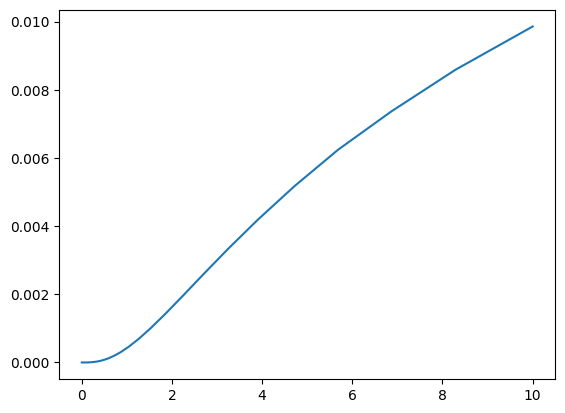

In [6]:
zs = np.geomspace(0.001, 10, 50)
plt.plot(zs, od4_, label="SIE ewoud")
plt.show()

In [4]:
# multiprocess
def optical_depth_multiprocessing2(zs):

    zs = np.array([zs]).reshape(-1)
    no = 8*1e-3*od3.cosmo.h**3
    vd_inv_cdf = od3.vd_inv_cdf
    splinedVcdz = od3.splinedVcdz
    splineDa = od3.splineDa
    idx = np.arange(len(zs))
    zl_list = np.linspace(0.001, 10, 100)

    input_params = [(zs[i], no, vd_inv_cdf, splinedVcdz, splineDa, idx[i], zl_list) for i in range(len(zs))]

    # Create a pool of workers and parallelize the integration
    with Pool(processes=4) as pool:
        tau_list = list(pool.map(optical_depth_sie1_mp, input_params))

    return tau_list

In [5]:
zs = np.geomspace(0.001, 10, 5)
test2 = optical_depth_multiprocessing2(zs=zs)

In [13]:
np.array(test2)

array([[ 0.00000000e+00, -5.01798572e-12],
       [ 1.00000000e+00,  9.97231320e-10],
       [ 2.00000000e+00,  8.40361786e-07],
       [ 3.00000000e+00,  4.08587890e-04],
       [ 4.00000000e+00,  9.51857986e-03]])

In [9]:
od3_=test2[:,1][np.array(test2[:,0], dtype=int)]

TypeError: list indices must be integers or slices, not tuple

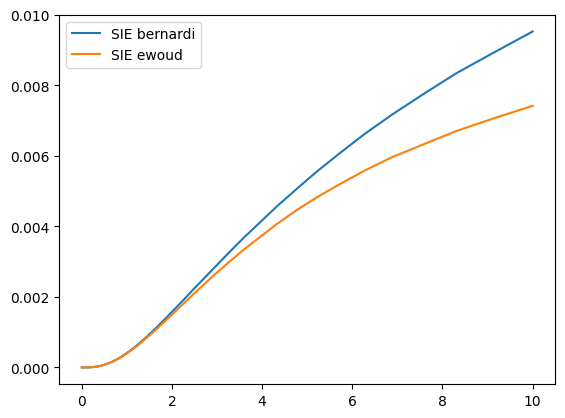

In [27]:
zs = np.geomspace(0.001, 10, 100)
plt.plot(zs, od3_, label="SIE bernardi")
plt.plot(zs, od4_, label="SIE ewoud")
plt.legend()
plt.show()

In [76]:
params = input_params[0]
# integrand
zs = params[0]
no = params[1]
z_list = params[6]
vd_inv_cdf = params[2]
vd_inv_cdf_coeff = vd_inv_cdf[:,0]
vd_list = vd_inv_cdf[0,1]
vd_sampler = njit(lambda size_,zl_: inverse_transform_sampler(size_, vd_inv_cdf_coeff[np.searchsorted(z_list, zl_)], vd_list))

splineDa = params[4]
splineDa_coeff = splineDa[0]
splineDa_z_list = splineDa[1]
Da_zs = cubic_spline_interpolator(np.array([zs]), splineDa_coeff, splineDa_z_list)[0]
Da = njit(lambda zl_: cubic_spline_interpolator(np.array([zl_]), splineDa_coeff, splineDa_z_list)[0])

splinedVcdz = params[3]
dVcdz = njit(lambda zl_: cubic_spline_interpolator(np.array([zl_]), splinedVcdz[0], splinedVcdz[1])[0])

In [84]:
@njit
def tau_integrand(zl, zs):

    # velocity dispersion #
    size = 5000
    sigma = vd_sampler(size, zl)

    # axis ratio 
    q = axis_ratio_rayleigh(sigma)  # if SIS, q=array of 1.0

    # einstein radius 
    Dls = (Da_zs*(1+zs) - Da(zl)*(1+zl))/(1+zs)
    theta_E = (
        4.0 * np.pi * (sigma / 299792.458) ** 2 * Dls / Da_zs
    )  # Note: km/s for sigma; Dls, Ds are in Mpc

    # cross section 
    cross_section_SIS = theta_E ** 2  # np.pi is ommited
    
    result = phi_cut_SIE(q) * cross_section_SIS/4 * no * dVcdz(zl)
    # average
    return np.mean(result)

In [85]:
%timeit test = tau_integrand(zl=0.5, zs=1.)

318 µs ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [94]:
# set up the parameters
zs = np.linspace(0.001, 10, 500)
zs = np.array([zs]).reshape(-1)
no = 8*1e-3*od3.cosmo.h**3
vd_inv_cdf = od3.vd_inv_cdf
splinedVcdz = od3.splinedVcdz
splineDa = od3.splineDa
idx = np.arange(len(zs))
zl_list = np.linspace(0.001, 10, 100)

input_params = [(zs[i], no, vd_inv_cdf, splinedVcdz, splineDa, idx[i], z_list) for i in range(len(zs))]

In [98]:
params = input_params[0]
# integrand
zs = params[0]
no = params[1]
z_list = params[6]
vd_inv_cdf = params[2]
vd_inv_cdf_coeff = vd_inv_cdf[0]
vd_list = vd_inv_cdf[1]
vd_sampler = njit(lambda size_: inverse_transform_sampler(size_, vd_inv_cdf_coeff, vd_list))

In [100]:
vd_sampler(10)

array([167.93817501, 138.97312604, 179.83018457, 123.73113521,
       179.07497221, 105.32294301, 177.57872236, 129.14921869,
       134.02711201,  95.36285153])

In [ ]:
    def lens_priors_categorization(
        self, lens_type, sampler_priors=None, sampler_priors_params=None, lens_functions=None,
    ):
        """
        Function to categorize the lens priors/samplers

        Parameters
        ----------
            lens_type : `str`
                lens type
                e.g. 'epl_galaxy' for elliptical power-law galaxy
            sampler_priors : `dict`
                dictionary of priors
            sampler_priors_params : `dict`
                dictionary of priors parameters
        """

        if lens_type == "epl_galaxy":
            sampler_priors_ = dict(
                source_redshift_sl="strongly_lensed_source_redshifts",
                lens_redshift="lens_redshift_SDSS_catalogue",
                velocity_dispersion="velocity_dispersion_gengamma",
                axis_ratio="axis_ratio_rayleigh",
                axis_rotation_angle="axis_rotation_angle_uniform",
                shear="shear_norm",
                mass_density_spectral_index="mass_density_spectral_index_normal",
                source_parameters="source_parameters",
            )
            sampler_priors_params_ = dict(
                source_redshift_sl=None,
                lens_redshift=None,
                velocity_dispersion=dict(a=2.32 / 2.67, c=2.67),
                axis_ratio=dict(q_min=0.2),
                axis_rotation_angle=dict(phi_min=0.0, phi_max=2 * np.pi),
                shear=dict(scale=0.05),
                mass_density_spectral_index=dict(mean=2.0, std=0.2),
                source_parameters=None,
            )
            lens_functions_ = dict(
                strong_lensing_condition="rjs_with_einstein_radius",
                optical_depth="optical_depth_SIS_haris",
                param_sampler_type="sample_all_routine1",
            ),
        else:
            raise ValueError("lens_type not recognized")

        # update the priors if input is given
        if sampler_priors:
            sampler_priors_.update(sampler_priors)
        if sampler_priors_params:
            sampler_priors_params_.update(sampler_priors_params)
        if lens_functions:
            lens_functions_.update(lens_functions)

        # dict of sampler names with description
        lens_sampler_names_ = dict(
            sample_source_redshift_sl="source parameters conditioned on the source being strongly lensed",
            sample_lens_redshift="lens redshift",
            sample_velocity_dispersion="velocity dispersion of elliptical galaxy",
            sample_axis_ratio="axis ratio of elliptical galaxy",
            sample_axis_rotation_angle="axis rotation angle of elliptical galaxy    ",
            sample_shear="shear of elliptical galaxy",
            sample_mass_density_spectral_index="mass density spectral index of elliptical power-law galaxy",
            sample_source_parameters="source parameters other than redshift",
        )

        return sampler_priors_, sampler_priors_params_, lens_sampler_names_

In [1]:
from numba import njit
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rayleigh
from ler.lens_galaxy_population import axis_ratio_rayleigh


In [3]:
@njit
def myrayleigh(scale, size):
    if scale <= 0:
        scale = 0.0001
    u = np.random.uniform(0, 1, size=size)
    return scale * np.sqrt(-2 * np.log(u))

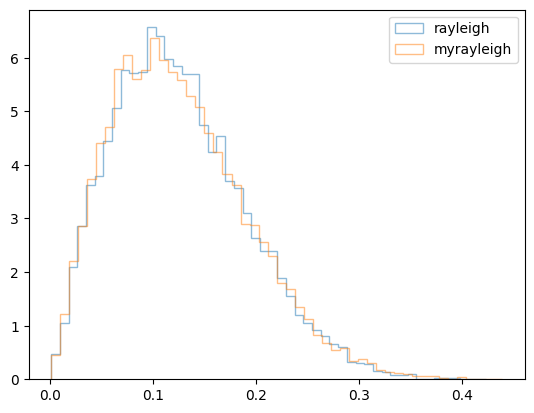

In [4]:
plt.hist(rayleigh.rvs(scale=0.1, size=10000), bins=50, density=True, alpha=0.5, label="rayleigh", histtype="step")
plt.hist(myrayleigh(scale=0.1, size=10000), bins=50, density=True, alpha=0.5, label="myrayleigh", histtype="step")
plt.legend()
plt.show()

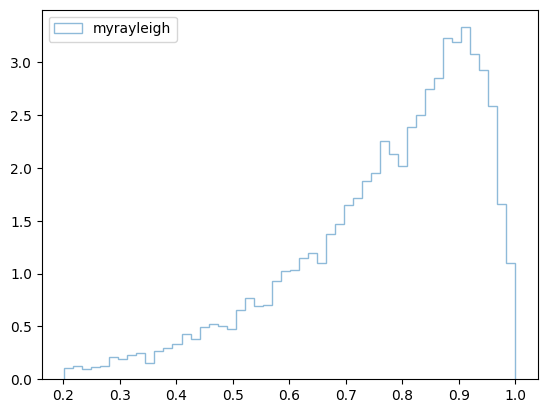

In [2]:
plt.hist(axis_ratio_rayleigh(sigma=np.random.uniform(60,600,10000)), bins=50, density=True, alpha=0.5, label="myrayleigh", histtype="step")
plt.legend()
plt.show()

In [28]:
# numpy random uniform sampler from 0 to 1
myaxis_ratio_rayleigh(sigma=np.random.uniform(60,600,10))


array([0.88814582, 0.91091202, 0.91645642, 0.86142095, 0.64283423,
       0.80781178, 0.65289448, 0.89242848, 0.88301624, 0.27172787])

In [27]:
random = njit(lambda size_: np.random.uniform(0, 1, size=1))
@njit
def myaxis_ratio_rayleigh(sigma, q_min=0.2):

        size = len(sigma)
        a = sigma / 161.0
        q = np.ones(size)
        idx = np.arange(size)  # idx tracker
        size_ = size

        while size_ != int(0):
            # Draw the axis ratio see Appendix of https://arxiv.org/pdf/1807.07062.pdf
            s = 0.38 - 0.09177 * a[idx]
            s[s<=0] = 0.0001

            u = np.random.uniform(0, 1, size=size_)
            b = s * np.sqrt(-2 * np.log(u))  # inverse cdf rayleigh distribution
            q_ = 1.0 - b

            # Weed out axis ratios that have axis ratio below q_min
            idx2 = q_ > q_min
            q[idx[idx2]] = q_[idx2]

            # remaining idx from the original array
            # that still not have axis ratio above q_min
            idx = idx[q <= q_min]
            size_ = len(idx)

        return q

In [7]:
@njit
def test():
    size = 10000
    while size > 0:
        u = np.random.uniform(0, 1, size=size)
        size_ = len(u[u>0.5])
        size -= size_

    return size

In [1]:
from ler.lens_galaxy_population import axis_ratio_rayleigh
import numpy as np

In [2]:
axis_ratio_rayleigh(np.random.uniform(60,600,10))

array([0.68869513, 0.3119846 , 0.86258572, 0.86156414, 0.70014502,
       0.96672595, 0.85504922, 0.7470779 , 0.73342477, 0.94186559])

In [3]:
2135+685+1793+155+380+162+1532

6842